<a href="https://colab.research.google.com/github/murodbeka/ABtesting_testing_portal_redesign/blob/main/multilinear_reg_advertisement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 Residual Diagnostics: Q-Q Plot for Normality Check

## 📌 Introduction

After fitting a multiple linear regression model, it's critical to evaluate whether the **residuals are normally distributed**, which is one of the key assumptions of linear regression. One effective way to visually assess this is by using a **Q-Q (Quantile-Quantile) plot**.

## 🎯 Objective

- Generate a **Q-Q plot** to inspect whether the residuals of the regression model follow a **normal distribution**.
- Identify potential deviations from normality, which may suggest the need for transformations, robust methods, or model re-specification.

The Q-Q plot will help validate the appropriateness of using Ordinary Least Squares (OLS) regression by checking the normality assumption.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
data = data.rename(columns={'TV':'tv','Radio':'radio','Newspaper':'newspaper','Sales':'sales'})
data.drop('Unnamed: 0', axis=1, inplace=True)
data


,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
data.isna().sum()

,0
tv,0
radio,0
newspaper,0
sales,0


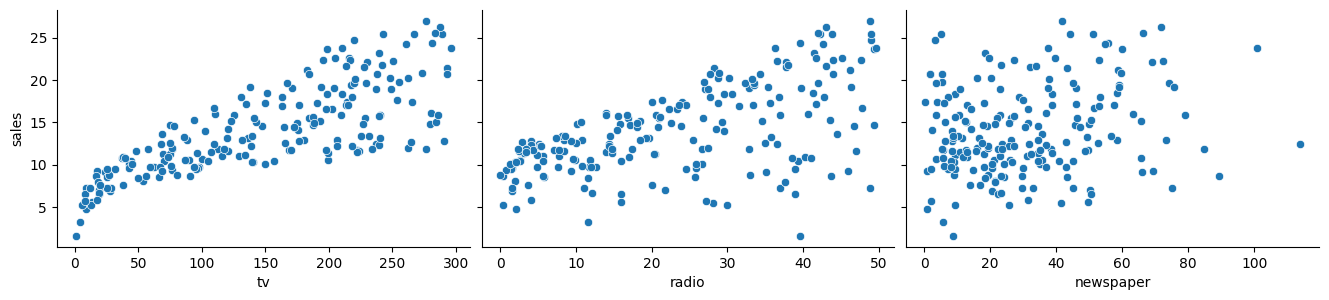

In [ ]:
# Scatterplots vs Price
sns.pairplot(data, x_vars=['tv','radio','newspaper'], y_vars=['sales'], kind='scatter',height=3, aspect=1.5)
plt.show()

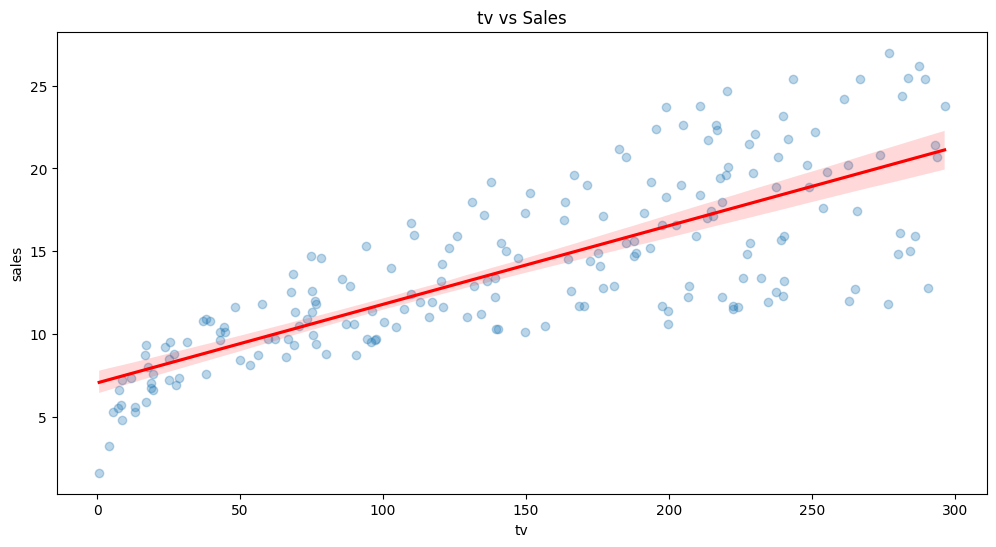

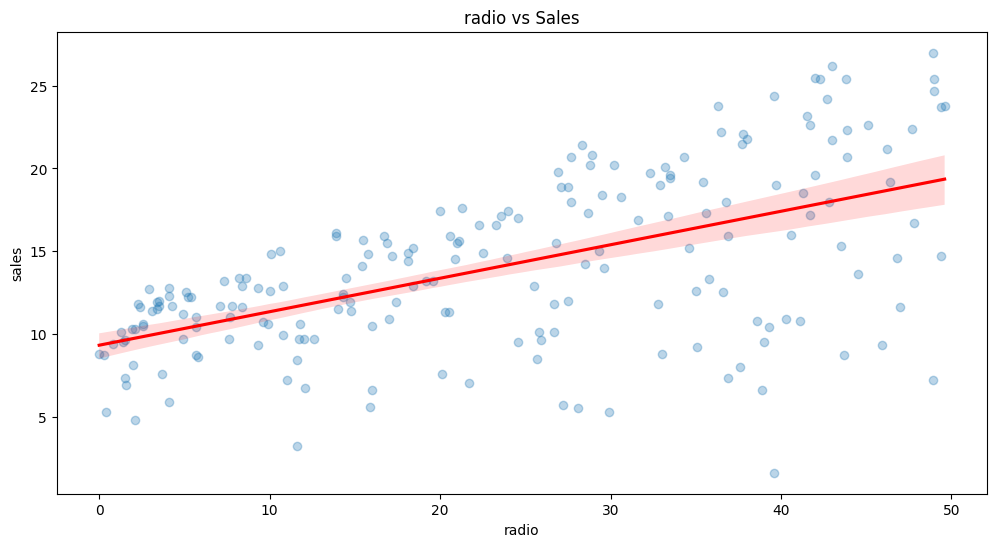

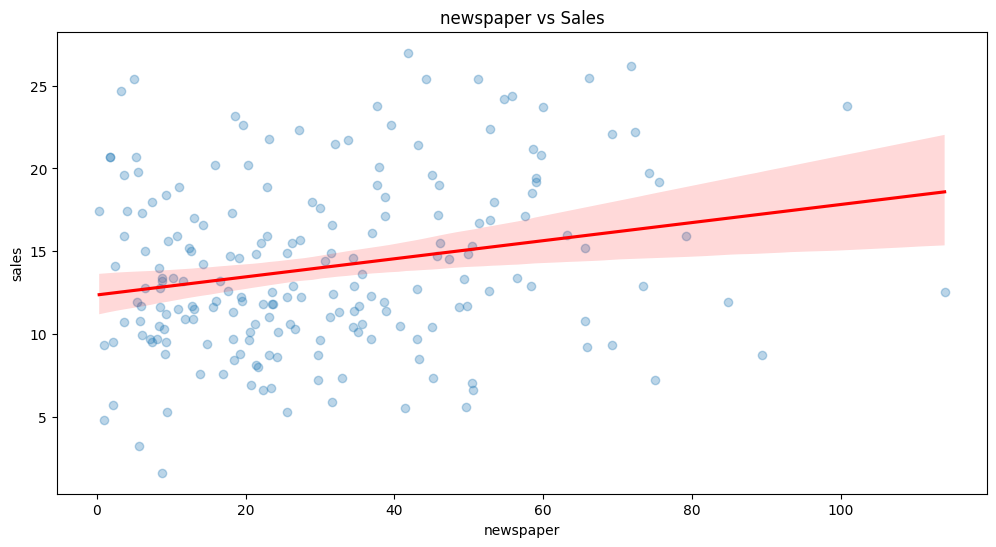

In [ ]:
# tv vs sales

import seaborn as sns
import matplotlib.pyplot as plt

for column in ['tv','radio','newspaper']:
  plt.figure(figsize=(12, 6))
  sns.regplot(x=column, y='sales', data=data,
              scatter_kws={'alpha':0.3},
              line_kws={'color':'red'})
  plt.title(f'{column} vs Sales')
  plt.show()

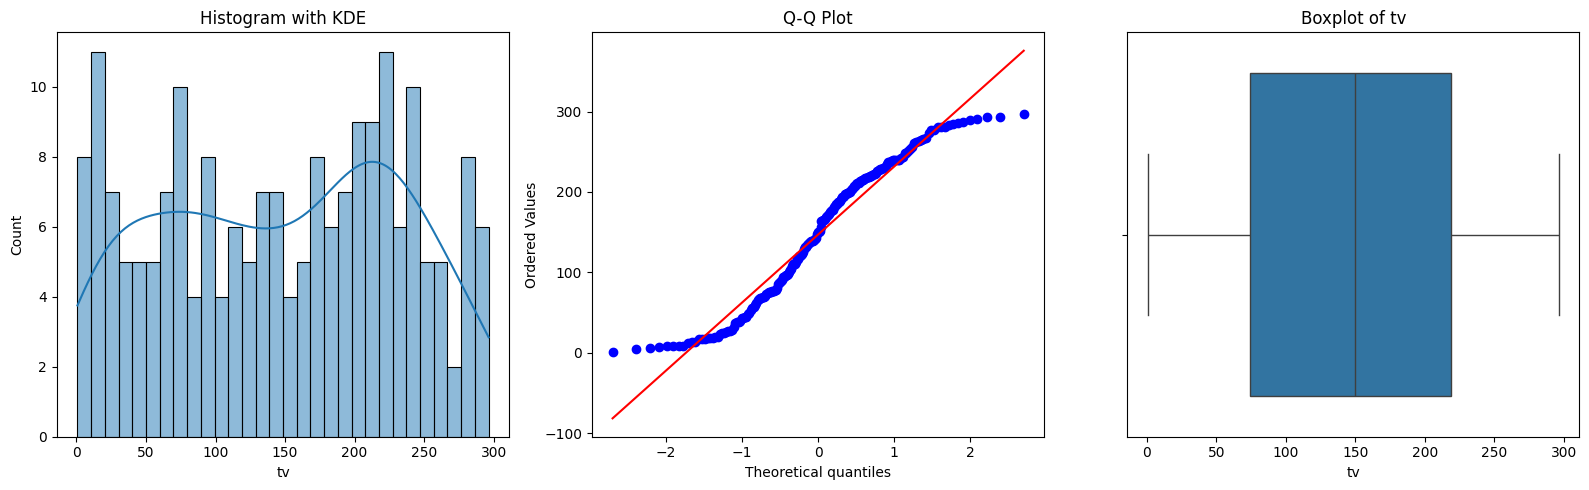

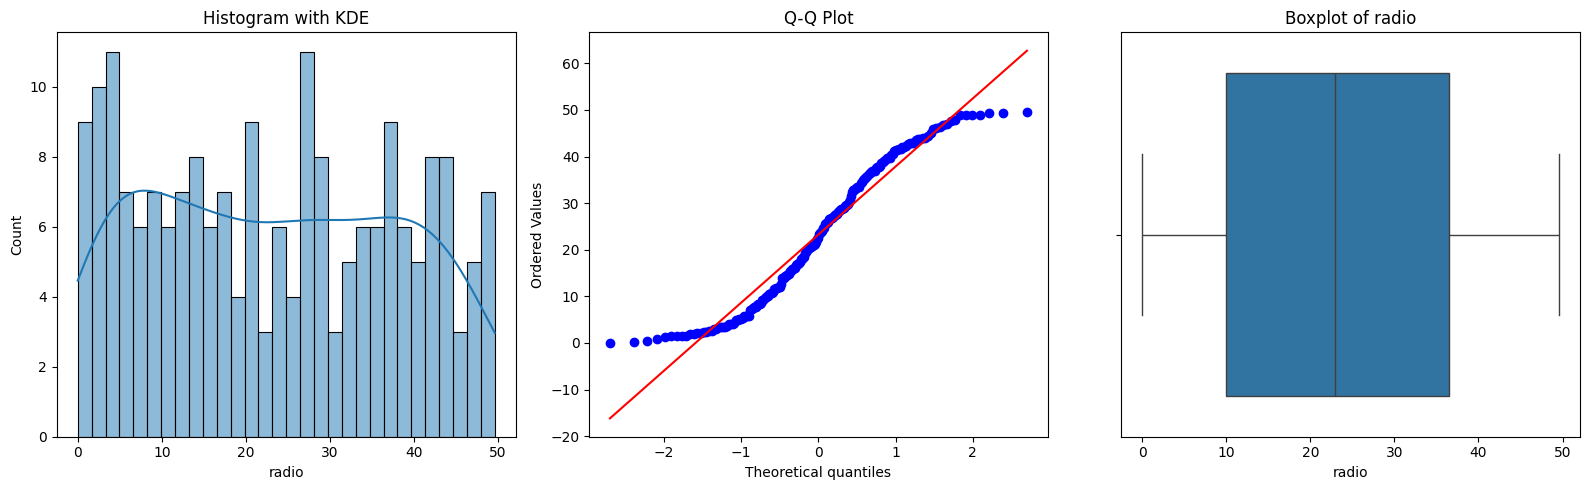

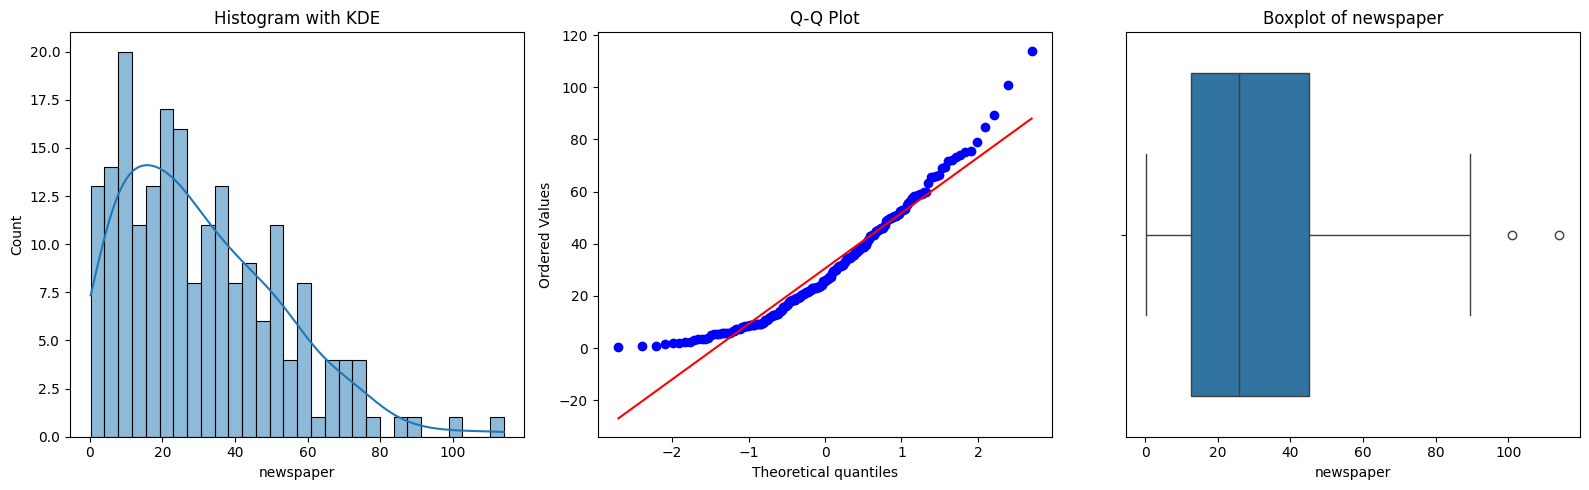

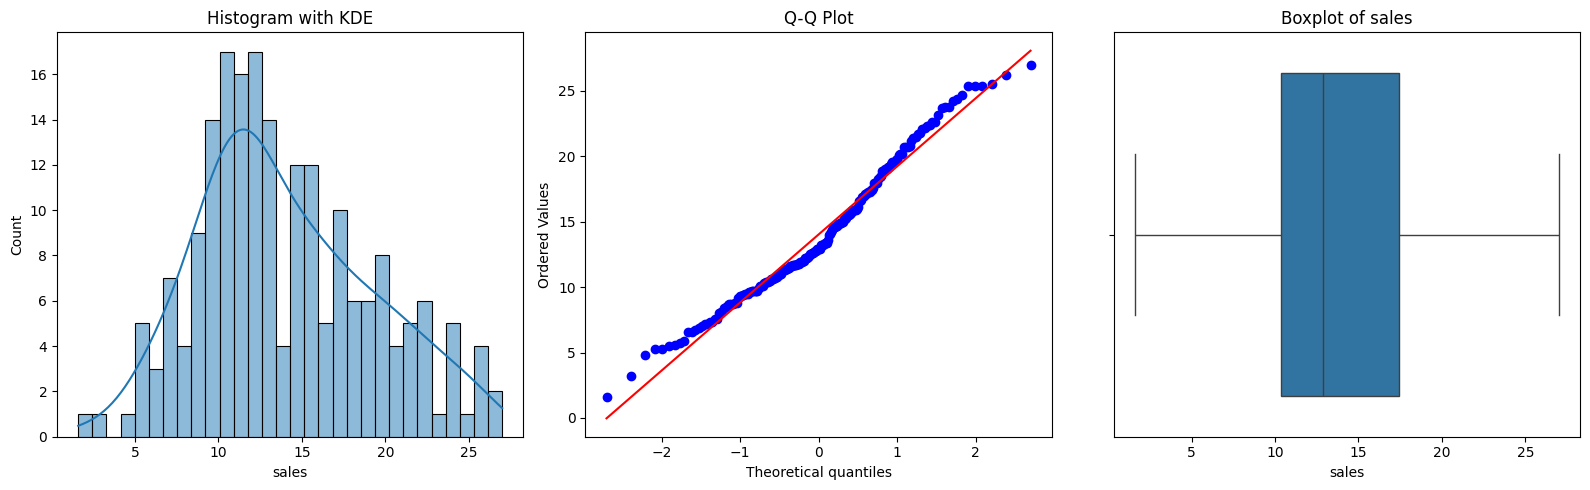

In [ ]:
from scipy.stats import probplot

for column in ['tv','radio','newspaper','sales']:
  plt.figure(figsize=(16, 5))

  plt.subplot(1, 3, 1)
  sns.histplot(data[column], kde=True, bins=30)
  plt.title('Histogram with KDE')

  plt.subplot(1, 3, 2)
  probplot(data[column], dist="norm", plot=plt)
  plt.title('Q-Q Plot')

  plt.subplot(1, 3, 3)
  sns.boxplot(x=data[column])
  plt.title(f'Boxplot of {column}')

  plt.tight_layout()
  plt.show()


In [ ]:
# from scipy.stats.mstats import winsorize
data['log_newspaper'] = np.log(data['newspaper'])
# data['log_tv'] = np.log(data['tv'])
# data['log_radio'] = np.log(data['radio'])
# data['sqrt_newspaper'] = np.sqrt(data['log_newspaper'])
# data['sqrt_tv'] = np.sqrt(data['log_tv'])
# data['sqrt_radio'] = np.sqrt(data['log_radio'])
# data['win_newspaper'] = winsorize(data['log_newspaper'], limits=[0.01, 0.01])
# data['win_tv'] = winsorize(data['log_tv'], limits=[0.01, 0.01])
# data['win_radio'] = winsorize(data['log_radio'], limits=[0.01, 0.01])


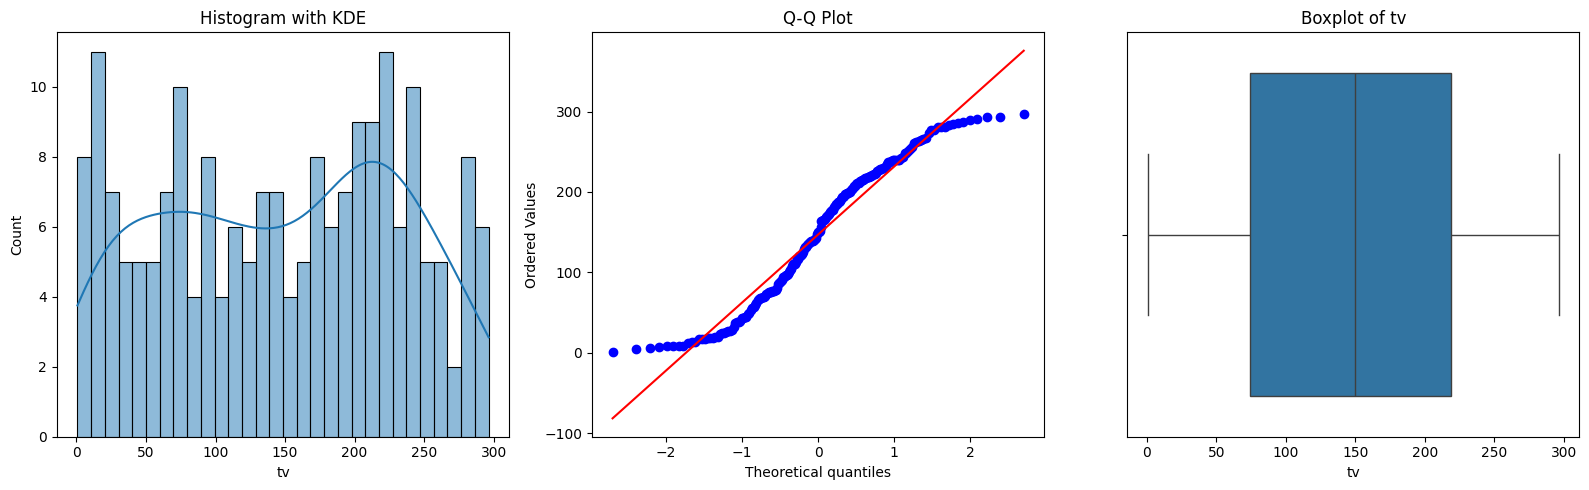

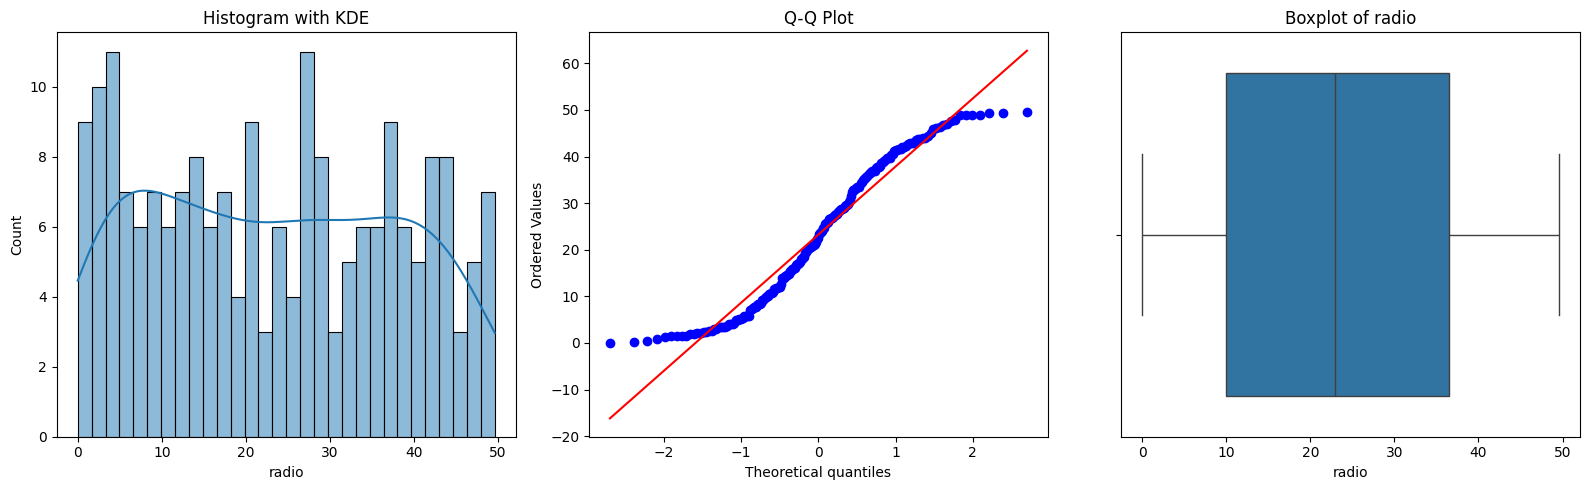

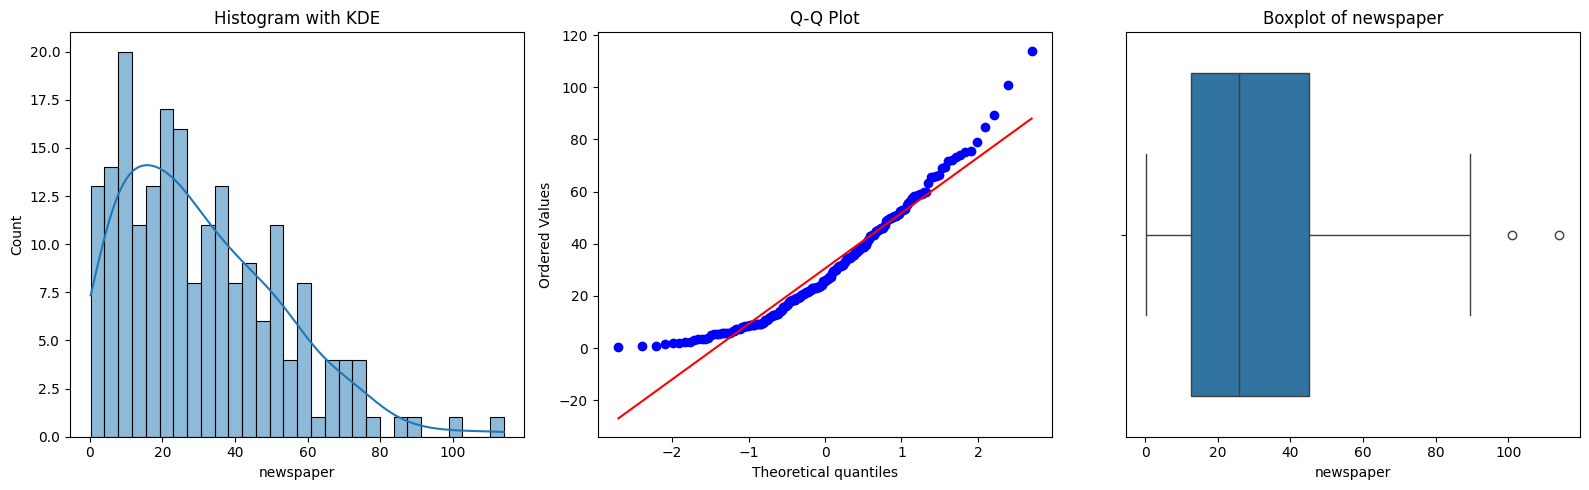

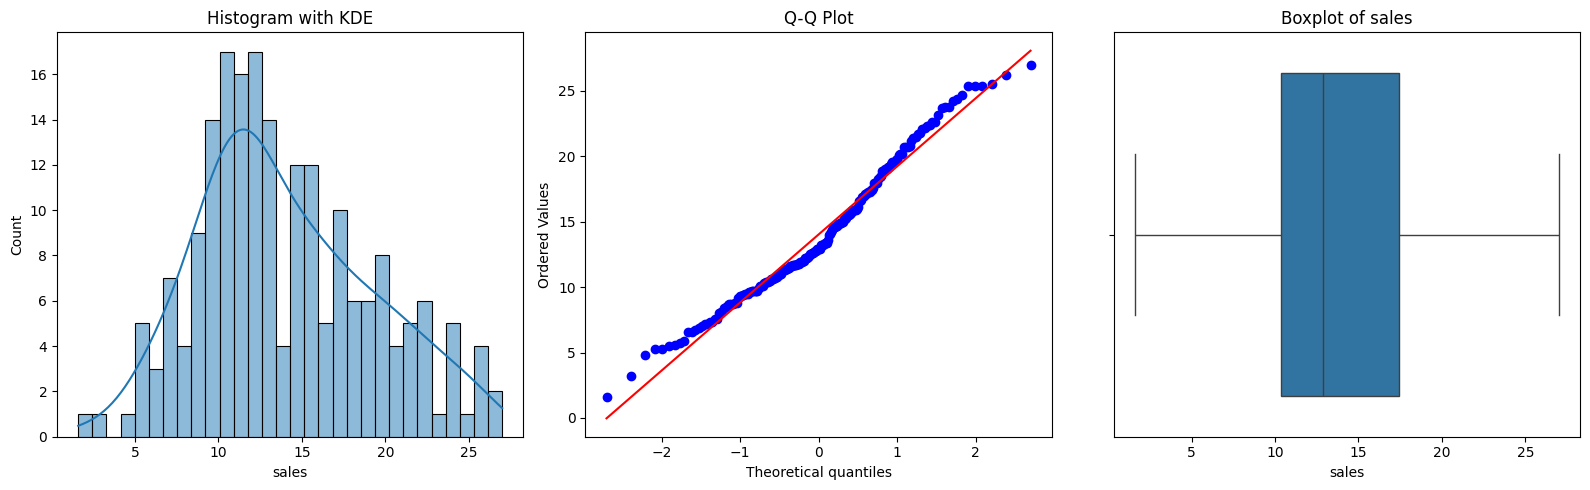

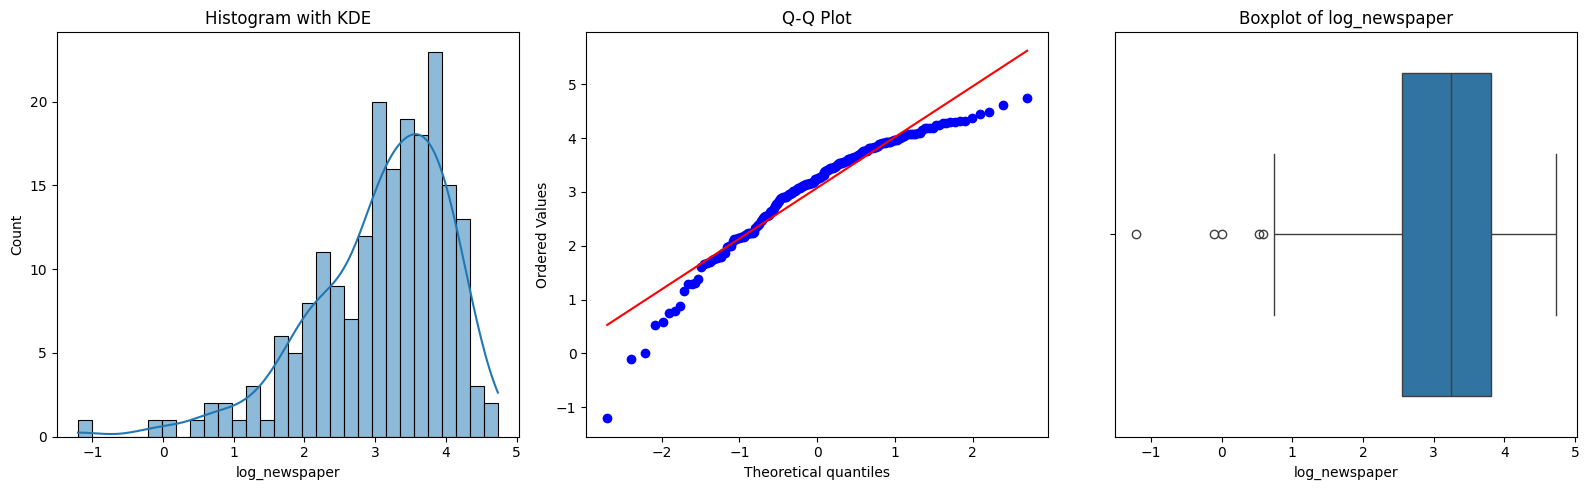

In [ ]:
from scipy.stats import probplot

for column in data.columns:
  plt.figure(figsize=(16, 5))

  plt.subplot(1, 3, 1)
  sns.histplot(data[column], kde=True, bins=30)
  plt.title('Histogram with KDE')

  plt.subplot(1, 3, 2)
  probplot(data[column], dist="norm", plot=plt)
  plt.title('Q-Q Plot')

  plt.subplot(1, 3, 3)
  sns.boxplot(x=data[column])
  plt.title(f'Boxplot of {column}')

  plt.tight_layout()
  plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd
import statsmodels.api as sm

X = data[['tv', 'radio', 'log_newspaper']]
X = sm.add_constant(X)
y = data['sales']


model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.5
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           1.53e-96
Time:                        02:01:36   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             780.3
Df Residuals:                     196   BIC:                             793.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8160      0.451      6.245

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd


vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

        Variable        VIF
0          const  14.319799
1             tv   1.003147
2          radio   1.062308
3  log_newspaper   1.059737


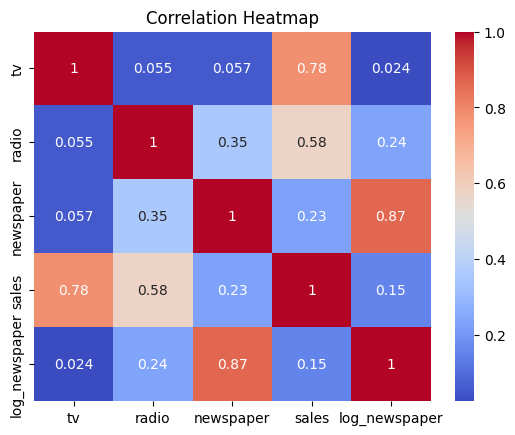

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Breusch-Pagan test for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

_, p_value, _, _ = het_breuschpagan(model.resid, X)
print(f'p-value for heteroscedasticity: {p_value}')


p-value for heteroscedasticity: 0.1484442535902685


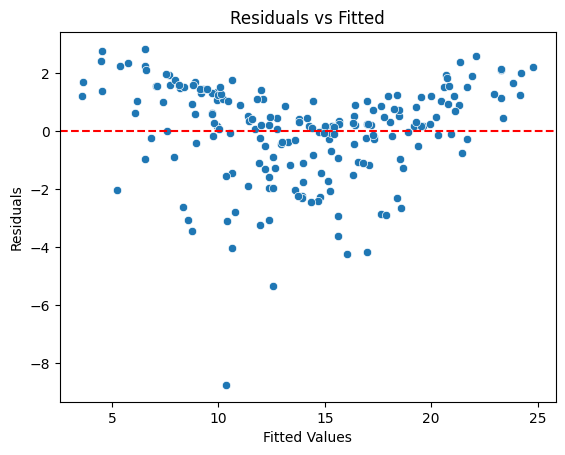

In [ ]:
residuals = model.resid
fitted = model.fittedvalues

sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

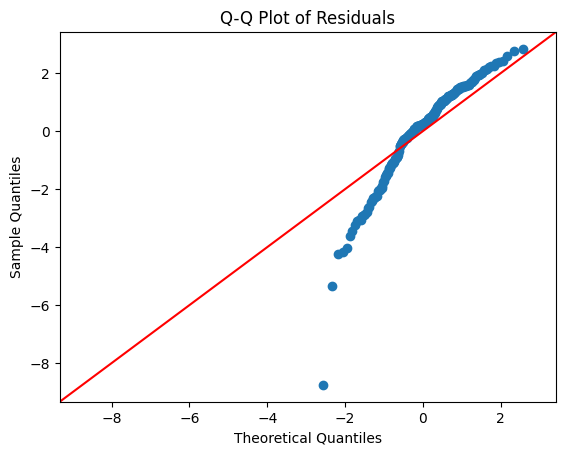

In [ ]:
import scipy.stats as stats

sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()